<a href="https://colab.research.google.com/github/salmagamal888/Data-Analysis/blob/main/Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Summary

The aim of this notebook is to find the brightest objects in the night sky and visualize their distribution

> *What do we need?*
1. Define "brightness"
2. Scrap the web to find the brightest objects.
3. Collect the relavent data about these objects.
4. Visualize our findings

## Brightness ⭐

Now what does "brightness" actually mean? Well, the answer, like most things in astronomy is a bit compliciated. To describe how bright an object is, astronomers use many definitions; absolute magnituede, luminosity and apparent magnitude are the most common.
Here we'll be using the apparent magnitude. It signifies how bright an object "appears" to be if observed, say by our naked eyes, from Earth.
This measure of brightness has the counter intuitive property of working in reverse, meaning ***negative values are actually brighter*** so keep this in mind as we explore our data.

### What are the brightest objects in the nightsky?

To answer our first question, what are the brightest objects in the nightsky, we'll be scrapping a wikipedia page that contains a list of the brightest 300 objects (objects with highest apparent magnitude).

In [317]:
#preinstalled in colab, otherwise install
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
#data sources
brightest_objs='https://en.wikipedia.org/wiki/List_of_brightest_natural_objects_in_the_sky'

Note that most of the elements we'll be scrapping in this project happen to be tabels.
If you need a refresher on tables in HTML I highly recommend this [Link](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/tr)
.It provides a dynamic explaination but in short we have the "th" element for header cells (columns), "td" for table data cells and "tr" for table rows.

In [319]:
#declair functions
def scrap_tables(URL):
  ''' description: Find all the tables in a webpage
  arguments: page URL
   returns: the table HTML and the number of tables in the page
   '''
  page=requests.get(URL)
  soup=BeautifulSoup(page.content, 'html.parser')
  tables=soup.find_all("table")
  n_tables=len(soup.find_all("table"))
  return tables, n_tables

def get_text_list(soup_object,  what_to_scrap):
  '''get all values with a specific HTML tag element in the form of a list
  arguments: the soup object (ex: table) and the tag to be scrapped
  '''
  O_list=soup_object.find_all(f'{what_to_scrap}')
  return np.array([O_list[i].get_text()[:-1] for i in range(len(O_list)) ] )

def data_to_df(data_list,columns):
  data_list=data_list.reshape(int(data_list.shape[0]/len(columns)), len(columns)) #to have a list for each row
  return pd.DataFrame(data_list, columns=columns)


In [320]:
tables, n_tables=scrap_tables(brightest_objs)
brightest_objs=tables[0]

In [321]:
cols=['Apparent_mag', 'Object_name', 'Obj_Type']

In [322]:
#srap the data
data=get_text_list(brightest_objs, "tr")
data[:5]

array(['\nApparent magnitude (V)\nName/designation\nObject type\nNotes',
       '\nMean\n\nMaximum',
       '\n−26.74[1]\n\n−26.78[Note 1]\n\nSun\n\nStar\n\nBrightest star',
       '\n−10.79[Note 2]\n\n−12.94[Note 3]\n\nMoon\n\nNatural satellite\n\nBrightest natural satellite',
       '\n−4.14[6]:\u200a32\u200a\n\n−4.92[6]:\u200a32\u200a\n\nVenus\n\nPlanet\n\nBrightest planet'],
      dtype='<U109')

These are the first 5 rows in our table (including our header row). We need to extract the relavent data and put it in a dataframe.

In [323]:
rows=[row.split('\n') for row in data]
rows=[row[2:-1] if len(row)==10 else row[:-1] for row in rows[2:] ] #remove the mean magnitudes
rows=np.array([i  for item in rows for i in item if i!=''])

In [350]:
brightest_objects=data_to_df(rows, cols)
brightest_objects

,Apparent_mag,Object_name,Obj_Type
0,−26.78[Note 1],Sun,Star
1,−12.94[Note 3],Moon,Natural satellite
2,−4.92[6]: 32,Venus,Planet
3,−2.94[6]: 39,Jupiter,Planet
4,−1.46,Sirius,Binary star system
...,...,...,...
308,3.55,Theta Pegasi,Binary star system
309,3.42,Kappa Canis Majoris,Star
310,3.3,Chi Cygni,Star
311,3.5,R Hydrae,Star


In [351]:
 #reformat the app mag
brightest_objects.Apparent_mag=np.array([row.split('[')[0].replace('−', '-') for row in brightest_objects.Apparent_mag]).astype(float)
brightest_objects.sort_values(by='Apparent_mag')[:10]

,Apparent_mag,Object_name,Obj_Type
0,-26.78,Sun,Star
1,-12.94,Moon,Natural satellite
2,-4.92,Venus,Planet
3,-2.94,Jupiter,Planet
18,-2.94,Mars,Planet
12,-2.48,Mercury,Planet
4,-1.46,Sirius,Binary star system
5,-0.74,Canopus,Star
15,-0.55,Saturn,Planet
6,-0.29,Alpha Centauri AB,Binary star system


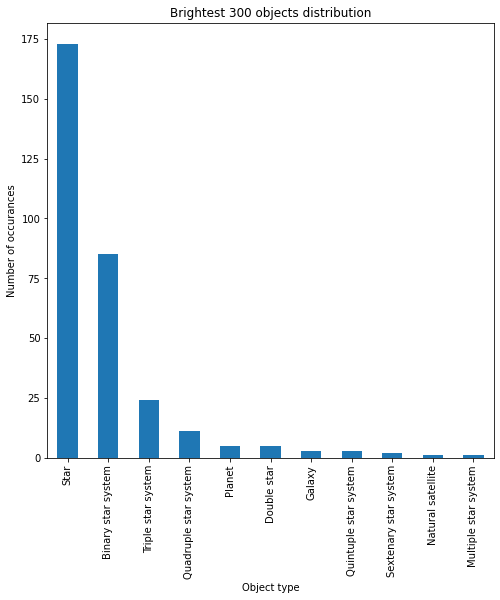

In [326]:
plt.figure(figsize=(8,8))
plt.title('Brightest 300 objects distribution')
plt.xlabel("Object type")
plt.ylabel("Number of occurances")
brightest_objects.Obj_Type.value_counts().plot.bar();

In [327]:
#Label different star systems "Stars"
brightest_objects['Obj_Type']=['Star' if ('Star' in object)|('star' in object)==True else object  for object in brightest_objects.Obj_Type]

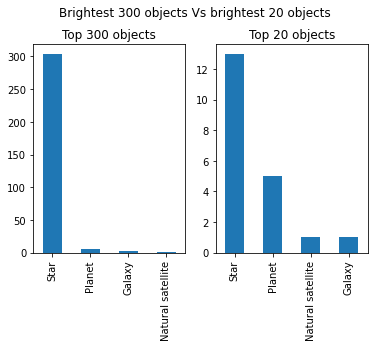

In [328]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.5, top=0.85)
fig.suptitle("Brightest 300 objects Vs brightest 20 objects", fontsize=12)
brightest_objects.Obj_Type.value_counts().plot.bar(ax=axes[0]);
axes[0].title.set_text('Top 300 objects')
brightest_objects[0:20].Obj_Type.value_counts().plot.bar(ax=axes[1]);
axes[1].title.set_text('Top 20 objects')


As we can see from the plot above, Stars do represent the vast majority of bright objects in the sky but when looking at the top 20 objects, we can see that planets, the moon and galaxies are also added to the mix. Our focus for the rest of this notebook will be on only the first 100 brightest objects.

In [329]:
#Limit only 100 brightest objects
brightest_objects=brightest_objects.sort_values(by='Apparent_mag')[:100]

In [330]:
planets_galaxies=brightest_objects[brightest_objects.Obj_Type!='Star'].reset_index(drop=True)
planets_galaxies

,Apparent_mag,Object_name,Obj_Type
0,-12.94,Moon,Natural satellite
1,-4.92,Venus,Planet
2,-2.94,Jupiter,Planet
3,-2.94,Mars,Planet
4,-2.48,Mercury,Planet
5,-0.55,Saturn,Planet
6,0.13,Large Magellanic Cloud,Galaxy
7,1.87,Small Magellanic Cloud,Galaxy


Now as for the planetary distance from Earth it is, surprizingly, a loaded question. Planets move constantly and thus their distance varies. For our current purposes **note that** the distance and apparent magnitudes we're working with are those we get when the planet is closest to Earth.
I suggest you visit this [website](https://www.timeanddate.com/astronomy/planets/) 
distance for a simulation on planets positions and brightness throughout the years.
Also this very interesting [video](https://www.youtube.com/watch?v=GDgbVIqGADQ) which explains how Mercury, not Venus, is actually the closest planet o Earth on average.

In [331]:
#Not star objects distances
planets=pd.read_excel('Planets_data.xlsx')
planets

,Object_name,Distance Ly
0,Mars,8.280545e-06
1,Jupiter,6.645681e-05
2,Venus,4.375983e-06
3,Mercury,9.691746e-06
4,Saturn,1.347676e-04
5,Large Magellanic Cloud,1.582000e+05
6,Small Magellanic Cloud,1.990000e+05
7,Andromeda,1.100000e+05
8,Moon,4.063111e-08


In [332]:
planets_galaxies=planets_galaxies.merge(planets,on='Object_name')
planets_galaxies

,Apparent_mag,Object_name,Obj_Type,Distance Ly
0,-12.94,Moon,Natural satellite,4.063111e-08
1,-4.92,Venus,Planet,4.375983e-06
2,-2.94,Jupiter,Planet,6.645681e-05
3,-2.94,Mars,Planet,8.280545e-06
4,-2.48,Mercury,Planet,9.691746e-06
5,-0.55,Saturn,Planet,1.347676e-04
6,0.13,Large Magellanic Cloud,Galaxy,1.582000e+05
7,1.87,Small Magellanic Cloud,Galaxy,1.990000e+05


Now we have the relavent data for all objects but stars, for that we turn our attention to yet another wikipedia page that happens to have a list of all the brightest stars of intrest.

#### Brightest stars data

In [333]:
wiki="https://en.wikipedia.org/wiki/List_of_brightest_stars" #brightest stars list

In [334]:
tables, n_tables= scrap_tables(wiki)
n_tables

5

In [335]:
brightest_stars_t=tables[2]

In [336]:
#scrapping the table headers
columns=get_text_list(brightest_stars_t, "th")
columns

array(['Rank', 'Visual magnitude (mV)', 'Proper name[6]',
       'Bayerdesignation', 'Distance (ly)', 'Spectral type'], dtype='<U21')

In [337]:
#note keeping the naming convensions of our planets and galaxies dataframe
columns_df=['Rank', 'Apparent_mag', 'Object_name',
       'Bayerdesignation', 'Distance Ly', 'Spectral_type']

In [338]:
#scrapping data values
data_list=get_text_list(brightest_stars_t, "td")

In [339]:
data_list.shape

(558,)

In [340]:
stars_df=data_to_df(data_list,columns_df)
stars_df.head()


,Rank,Apparent_mag,Object_name,Bayerdesignation,Distance Ly,Spectral_type
0,0,0.000−26.74,Sun,,0.000015823820,G2 V
1,1,0.001−1.46,Sirius,α CMa,0008.6,"A0mA1 Va, DA2"
2,2,0.003−0.74,Canopus,α Car,0310,A9 II
3,3,0.004−0.27 (0.01 + 1.33),Rigil Kentaurus& Toliman,α Cen,0004.4,"G2 V, K1 V"
4,4,0.005−0.05,Arcturus,α Boo,0037,K0 III


In [341]:
stars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              93 non-null     object
 1   Apparent_mag      93 non-null     object
 2   Object_name       93 non-null     object
 3   Bayerdesignation  93 non-null     object
 4   Distance Ly       93 non-null     object
 5   Spectral_type     93 non-null     object
dtypes: object(6)
memory usage: 4.5+ KB


In [342]:
#replace the comma values, change to float
stars_df['Distance Ly']=np.array([stars_df['Distance Ly'][i].replace(",", "" ) for i in range(len(stars_df['Distance Ly']))]).astype(float)

In [343]:
#reformat the apparent magnitude values
split=[stars_df['Apparent_mag'][i].split('−') for i in range(len(stars_df['Apparent_mag']))] 
no_neg=['-'+item[1] if  len(item) >1 else item[0]  for item in split]
final_list=[item.split(' ')[0] for item in no_neg] 
final_list[10]=0.50
final_list[5]=final_list[5].split('–')[0]

In [344]:
stars_df['Apparent_mag']=np.array(final_list).astype(float)
stars_df.head()

,Rank,Apparent_mag,Object_name,Bayerdesignation,Distance Ly,Spectral_type
0,0,-26.74,Sun,,0.000016,G2 V
1,1,-1.46,Sirius,α CMa,8.600000,"A0mA1 Va, DA2"
2,2,-0.74,Canopus,α Car,310.000000,A9 II
3,3,-0.27,Rigil Kentaurus& Toliman,α Cen,4.400000,"G2 V, K1 V"
4,4,-0.05,Arcturus,α Boo,37.000000,K0 III


In [345]:
stars_df['Obj_Type']=['Star' for row in stars_df.Rank]
stars_df

,Rank,Apparent_mag,Object_name,Bayerdesignation,Distance Ly,Spectral_type,Obj_Type
0,0,-26.74,Sun,,0.000016,G2 V,Star
1,1,-1.46,Sirius,α CMa,8.600000,"A0mA1 Va, DA2",Star
2,2,-0.74,Canopus,α Car,310.000000,A9 II,Star
3,3,-0.27,Rigil Kentaurus& Toliman,α Cen,4.400000,"G2 V, K1 V",Star
4,4,-0.05,Arcturus,α Boo,37.000000,K0 III,Star
...,...,...,...,...,...,...,...
88,88,2.46,Markeb,κ Vel,540.000000,B2 IV,Star
89,89,2.47,,γ Cas,610.000000,B0.5 IVe,Star
90,90,2.48,Markab,α Peg,140.000000,A0 IV,Star
91,91,2.48,Aljanah,ε Cyg,72.000000,K0 III-IV,Star


In [346]:
stars_df=stars_df.drop(['Rank', 'Bayerdesignation','Spectral_type'], axis=1 )
stars_df

,Apparent_mag,Object_name,Distance Ly,Obj_Type
0,-26.74,Sun,0.000016,Star
1,-1.46,Sirius,8.600000,Star
2,-0.74,Canopus,310.000000,Star
3,-0.27,Rigil Kentaurus& Toliman,4.400000,Star
4,-0.05,Arcturus,37.000000,Star
...,...,...,...,...
88,2.46,Markeb,540.000000,Star
89,2.47,,610.000000,Star
90,2.48,Markab,140.000000,Star
91,2.48,Aljanah,72.000000,Star


In [347]:
All_objects=pd.concat([stars_df, planets_galaxies]).sort_values(by='Apparent_mag').reset_index(drop=True)
All_objects

,Apparent_mag,Object_name,Distance Ly,Obj_Type
0,-26.74,Sun,1.582382e-05,Star
1,-12.94,Moon,4.063111e-08,Natural satellite
2,-4.92,Venus,4.375983e-06,Planet
3,-2.94,Jupiter,6.645681e-05,Planet
4,-2.94,Mars,8.280545e-06,Planet
...,...,...,...,...
96,2.46,Markeb,5.400000e+02,Star
97,2.47,,6.100000e+02,Star
98,2.48,Markab,1.400000e+02,Star
99,2.48,Aljanah,7.200000e+01,Star


Now that we have all of our data in one dataframe, we can finally plot our results.

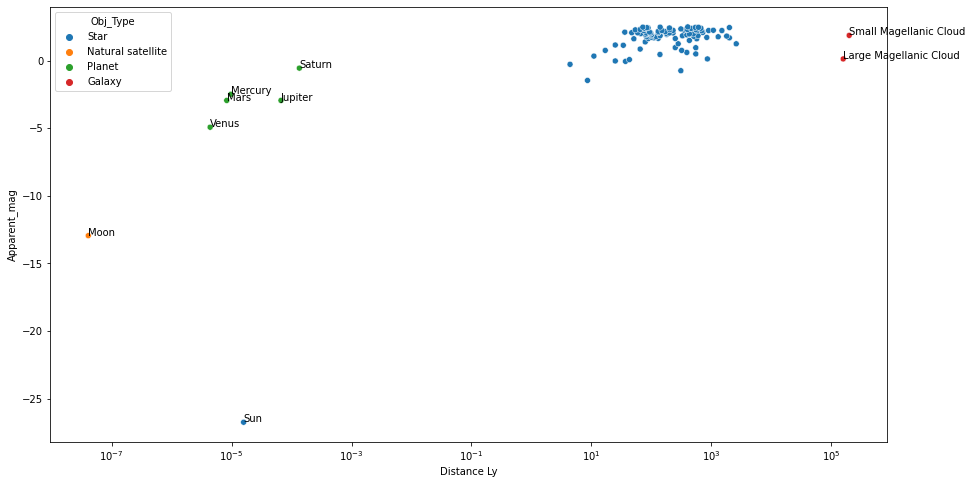

In [348]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=All_objects.Apparent_mag, x=All_objects['Distance Ly'], hue=All_objects.Obj_Type);
plt.xscale('log')
for i, name in enumerate(All_objects.Object_name):
  if ((All_objects.Obj_Type[i] =='Star') & (All_objects.Object_name[i]!= 'Sun')):
    continue
  else:
    plt.text(All_objects['Distance Ly'][i],All_objects.Apparent_mag[i], name) 
